#Part 1: Get vehicle mpg data into pandas and clean

In [1]:
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np
import pandas as pd

In [6]:
# Load the Drive helper and mount
from google.colab import drive

# Prompt for Authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls /content/drive/MyDrive/ECEN250/Lab7/vehmpgdata.csv

/content/drive/MyDrive/ECEN250/Lab7/vehmpgdata.csv


In [8]:
df = pd.read_csv('/content/drive/MyDrive/ECEN250/Lab7/vehmpgdata.csv', encoding = 'unicode_escape')
nRow, nCol = df.shape
print(f'Dataframe has {nRow} rows {nCol} colums')

Dataframe has 428 rows 21 colums


In [9]:
df.head()

,msrp,invoice,disp,cyl,hp,weight,wheelbase,length,width,sports,...,wagon,minivan,pickup,AWD,RWD,coupe,sedan,mpgclass,cmpg,hmpg
0,22388,20701,1.8,4.0,142,2387.0,89.0,156.0,66.0,1,...,0,0,0,0,1,1,0,2.0,23.0,28.0
1,35545,32244,3.8,6.0,205,3778.0,114.0,207.0,75.0,0,...,0,0,0,0,0,0,1,1.0,20.0,29.0
2,39235,36052,4.0,8.0,270,3953.0,106.0,185.0,69.0,0,...,0,0,0,0,0,0,1,1.0,18.0,25.0
3,45707,41966,3.2,6.0,215,3770.0,107.0,183.0,69.0,0,...,0,0,0,0,1,1,0,1.0,20.0,26.0
4,15500,14525,2.0,4.0,148,2696.0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   msrp       428 non-null    int64  
 1   invoice    428 non-null    int64  
 2   disp       428 non-null    float64
 3   cyl        426 non-null    float64
 4   hp         428 non-null    int64  
 5   weight     426 non-null    float64
 6   wheelbase  426 non-null    float64
 7   length     426 non-null    float64
 8   width      424 non-null    float64
 9   sports     428 non-null    int64  
 10  suv        428 non-null    int64  
 11  wagon      428 non-null    int64  
 12  minivan    428 non-null    int64  
 13  pickup     428 non-null    int64  
 14  AWD        428 non-null    int64  
 15  RWD        428 non-null    int64  
 16  coupe      428 non-null    int64  
 17  sedan      428 non-null    int64  
 18  mpgclass   417 non-null    float64
 19  cmpg       417 non-null    float64
 20  hmpg      

**Instruction: Since we will be using the datafile to predict the vehicle mpgclass, it would be cheating to use the city and highway mpg values, so drop the cmpg and hmpg features from your dataframe.Also eliminate the features that describe the type of vehicle, ‘sports', 'suv', 'wagon', 'minivan', 'pickup', ‘coupe’, and ‘sedan’.**

In [11]:
# drop the cmpg and hmpg features from your dataframe
df = df.drop(columns=['cmpg', 'hmpg'])

In [12]:
# insert code to eliminate the features that describe the type of vehicle, ‘sports', 'suv', 'wagon', 'minivan', 'pickup', ‘coupe’, and ‘sedan’
df = df.drop(columns=['sports', 'suv', 'wagon', 'minivan', 'pickup', 'coupe', 'sedan'])

In [13]:
# Creates a new dataframe with only the rows with NaNs in them
df2=df[df.isnull().any(axis=1)]

# Prints only the columns with NaNs
print(df2.loc[:, df2.isnull().any()])

      cyl  weight  wheelbase  length  width  mpgclass
4     4.0  2696.0        NaN     NaN    NaN       NaN
10    8.0  5194.0      118.0   204.0   75.0       NaN
65    4.0  2656.0      102.0   181.0   67.0       NaN
87    NaN  3053.0      106.0   174.0    NaN       1.0
96    6.0     NaN      107.0   178.0   68.0       1.0
140   NaN  3029.0      106.0   174.0    NaN       1.0
141   6.0     NaN      110.0   196.0   73.0       0.0
155   8.0  3725.0      110.0   190.0   73.0       NaN
213   4.0  2744.0      102.0   181.0   67.0       NaN
243   4.0  3351.0      108.0   191.0   72.0       NaN
267   4.0  2795.0      102.0   181.0   67.0       NaN
306   4.0  2762.0        NaN     NaN    NaN       NaN
327   4.0  3020.0      102.0   181.0   67.0       NaN
391  12.0  5399.0      118.0   204.0   75.0       NaN
399  10.0  7190.0      137.0   227.0   80.0       NaN


We will clean the dataframe to remove any NaNs:

In [14]:
df=df.dropna(subset=['mpgclass'])
df=df.dropna(subset=['weight'])
df=df.dropna(subset=['wheelbase'])
df=df.dropna(subset=['width'])
df=df.dropna(subset=['cyl'])

#Part 2: Train decision tree classifiers and evaluate their performance

**With your now clean dataframe, select the remaining features and perform train/validation/test splitting of the dataset. Use 60%, 20%, 20% for your split**

In [15]:
X=df.drop(columns=['mpgclass'])
y=df[['mpgclass']]

X.head()

,msrp,invoice,disp,cyl,hp,weight,wheelbase,length,width,AWD,RWD
0,22388,20701,1.8,4.0,142,2387.0,89.0,156.0,66.0,0,1
1,35545,32244,3.8,6.0,205,3778.0,114.0,207.0,75.0,0,0
2,39235,36052,4.0,8.0,270,3953.0,106.0,185.0,69.0,0,0
3,45707,41966,3.2,6.0,215,3770.0,107.0,183.0,69.0,0,1
5,34845,32902,2.3,5.0,247,3766.0,107.0,180.0,71.0,0,0


In [19]:
from sklearn.model_selection import train_test_split

# insert code to perform train/validation/test splitting
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

**Insert code below to print the size of the train/validation/test sets.**

In [20]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_validate shape:", x_validate.shape)
print("y_validate shape:", y_validate.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (247, 11)
y_train shape: (247, 1)
x_validate shape: (83, 11)
y_validate shape: (83, 1)
x_test shape: (83, 11)
y_test shape: (83, 1)


Now, we train a decision tree classifier using **gini** without any constraint on depth. Present the confusion matrix, accuracy, F1, and precision on **validation set** for that classifier.

In [21]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(x_train, y_train)

In [22]:
y_pred = clf.predict(x_validate)
y_pred

array([2., 2., 1., 2., 2., 0., 0., 1., 0., 0., 2., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 2., 0., 2., 0., 2., 2., 1., 0., 1., 2.,
       1., 0., 0., 2., 2., 0., 1., 2., 2., 1., 0., 1., 1., 0., 1., 0., 0.,
       2., 1., 1., 0., 1., 2., 1., 1., 1., 2., 2., 1., 1., 0., 0., 1., 1.,
       0., 2., 2., 0., 0., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1.])

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_validate, y_pred)
print(confusion_matrix(y_validate, y_pred))

# F1 & precision scores
print(classification_report(y_validate, y_pred))

Confusion Matrix:
[[17  5  0]
 [ 5 28  2]
 [ 0  3 23]]
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        22
         1.0       0.78      0.80      0.79        35
         2.0       0.92      0.88      0.90        26

    accuracy                           0.82        83
   macro avg       0.82      0.82      0.82        83
weighted avg       0.82      0.82      0.82        83



**Now, insert code below to train a decision tree using **entropy** without any constraint on depth. Present the confusion matrix, accuracy, F1, and precision for that classifier.**

In [24]:
from sklearn import tree

# Train a decision tree using entropy
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy')
clf_entropy = clf_entropy.fit(x_train, y_train)

# Predict on the validation set
y_pred_entropy = clf_entropy.predict(x_validate)

# Present the confusion matrix, accuracy, F1, and precision
print("Confusion Matrix (Entropy):")
print(confusion_matrix(y_validate, y_pred_entropy))

print("\nClassification Report (Entropy):")
print(classification_report(y_validate, y_pred_entropy))

Confusion Matrix (Entropy):
[[16  5  1]
 [ 5 27  3]
 [ 0  1 25]]

Classification Report (Entropy):
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74        22
         1.0       0.82      0.77      0.79        35
         2.0       0.86      0.96      0.91        26

    accuracy                           0.82        83
   macro avg       0.81      0.82      0.82        83
weighted avg       0.82      0.82      0.82        83



**Now, insert code below, using whichever criterion provided superior results, train decision trees with maximum_depth from 2 to 6. Present the confusion matrix, accuracy, F1, and precision for that classifier.**

In [25]:
best_accuracy = 0
best_clf = None
best_depth = 0

for depth in range(2, 7):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_validate)

    print(f"\nResults for max_depth = {depth}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_validate, y_pred))
    print("\nClassification Report:")
    report = classification_report(y_validate, y_pred)
    print(report)

    # Extract accuracy from the report
    accuracy = float(report.splitlines()[-3].split()[-2])

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_clf = clf
        best_depth = depth

print(f"\nBest decision tree classifier found with max_depth = {best_depth} and accuracy = {best_accuracy:.4f}")


Results for max_depth = 2:
Confusion Matrix:
[[16  6  0]
 [ 4 29  2]
 [ 0  7 19]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        22
         1.0       0.69      0.83      0.75        35
         2.0       0.90      0.73      0.81        26

    accuracy                           0.77        83
   macro avg       0.80      0.76      0.77        83
weighted avg       0.79      0.77      0.77        83


Results for max_depth = 3:
Confusion Matrix:
[[16  6  0]
 [ 4 29  2]
 [ 0  8 18]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        22
         1.0       0.67      0.83      0.74        35
         2.0       0.90      0.69      0.78        26

    accuracy                           0.76        83
   macro avg       0.79      0.75      0.76        83
weighted avg       0.78      0.76      0.76        83


Results for max_depth =

**Present the confusion matrix, accuracy, F1, and precision on your **test set** for the classifier which gave best results on validation.**

In [26]:
# Predict on the test set using the best classifier found on validation
y_pred_test = best_clf.predict(x_test)

# Present the confusion matrix, accuracy, F1, and precision on the test set
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Confusion Matrix (Test Set):
[[20  6  0]
 [ 5 21  4]
 [ 0  2 25]]

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78        26
         1.0       0.72      0.70      0.71        30
         2.0       0.86      0.93      0.89        27

    accuracy                           0.80        83
   macro avg       0.80      0.80      0.80        83
weighted avg       0.79      0.80      0.79        83



#Part 3: Train random forest classifiers and evaluate their performance

**We will use the same dataset to evaluate random forest classifiers. Using gini as the criterion and n_estimators=100, vary max_depth between 2 and 5. Select the best model.**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
depth = [2, 3, 4, 5]
best_accuracy_rf = 0
best_rf_clf = None
best_rf_depth = 0

for i in depth:
    rf_clf = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=i, random_state=42)
    rf_clf.fit(x_train, y_train.values.ravel())  # Use .values.ravel() for y
    y_pred_rf = rf_clf.predict(x_validate)

    print(f"\nResults for max_depth = {i}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_validate, y_pred_rf))
    print("\nClassification Report:")
    report_rf = classification_report(y_validate, y_pred_rf)
    print(report_rf)

    accuracy_rf = float(report_rf.splitlines()[-3].split()[-2])

    if accuracy_rf > best_accuracy_rf:
        best_accuracy_rf = accuracy_rf
        best_rf_clf = rf_clf
        best_rf_depth = i

print(f"\nBest Random Forest classifier found with max_depth = {best_rf_depth} and accuracy = {best_accuracy_rf:.4f}")


Results for max_depth = 2:
Confusion Matrix:
[[16  6  0]
 [ 3 28  4]
 [ 0  8 18]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78        22
         1.0       0.67      0.80      0.73        35
         2.0       0.82      0.69      0.75        26

    accuracy                           0.75        83
   macro avg       0.78      0.74      0.75        83
weighted avg       0.76      0.75      0.75        83


Results for max_depth = 3:
Confusion Matrix:
[[17  5  0]
 [ 2 30  3]
 [ 0  8 18]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83        22
         1.0       0.70      0.86      0.77        35
         2.0       0.86      0.69      0.77        26

    accuracy                           0.78        83
   macro avg       0.82      0.77      0.79        83
weighted avg       0.80      0.78      0.78        83


Results for max_depth =

# Part 4: Data load, cleaning, and classification modeling

We will be analyzing heart ECG data to classify causes of arrythmia. This example is a classification of normal and abnormal ECGs based on 16 total classes

Preparing Dataset

The acutal number of instances for the measurements are given below.  We won't make use of this to set our priors -- but we will verify these classes.

In [ ]:

# Class Distribution:

#  Class code :   Class   :                                             Number of instances:
#    01             Normal                                                      245
#    02             Ischemic changes (Coronary Artery Disease)                  44
#    03             Old Anterior Myocardial Infarction                          15
#    04             Old Inferior Myocardial Infarction                          15
#    05             Sinus tachycardy                                            13
#    06             Sinus bradycardy                                            25
#    07             Ventricular Premature Contraction (PVC)                     3
#    08             Supraventricular Premature Contraction                      2
#    09             Left bundle branch block                                    9
#    10             Right bundle branch block                                   50
#    11             1. degree AtrioVentricular block                            0
#    12             2. degree AV block                                          0
#    13             3. degree AV block                                          0
#    14             Left ventricule hypertrophy                                 4
#    15             Atrial Fibrillation or Flutter                              5
#    16             Others                                                      22


In [29]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Verify the datafile is in drive

In [30]:
!ls drive/MyDrive/ECEN250/Lab7/data_arrhythmia.csv

drive/MyDrive/ECEN250/Lab7/data_arrhythmia.csv


Load the datafile into pandas dataframe

In [32]:
df = pd.read_csv('drive/MyDrive/ECEN250/Lab7/data_arrhythmia.csv', delimiter=';')
df.dataframeName = 'data_arrhythmia.csv'
nRow, nCol = df.shape
print(f'Dataframe has {nRow} rows {nCol} colums')

Dataframe has 452 rows 280 colums


Notice this datafile has 280 features!  Much of the challenges in this lab is dealing with this large number of features.  The number of observations is actually quite low for this dataset.  It will be a challenge that will limit our classification effectiveness.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In [34]:
df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [35]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


This piece of code is useful when you have such a large number of features.  It shows which features are objects -- which often means that it has non-numerics mixed with numerics.

In [36]:
df.select_dtypes(include=['object'])

,T,P,QRST,J,heart_rate
0,13,64,-2,?,63
1,37,-17,31,?,53
2,34,70,66,23,75
3,11,-5,20,?,71
4,13,61,3,?,?
...,...,...,...,...,...
447,4,40,-27,?,63
448,66,52,79,?,73
449,-19,-61,-70,84,84
450,29,-22,43,103,80


OH NO! This dataset has used the character ?  for a missing or unknown value.  There are three strategies for fixing this -- one would be directly dropping any entries with ?, second would be trying to replace each ? with something else, and the third is to first convert them to NaNs -- then use what we already know to fix the NaN problem.  Strategy 1 will throw away too much data, 2 is very difficult, so choose 3!

In [37]:
#This will change object type to numeric and for non-numeric entries, force them to NaN
df['P'] = pd.to_numeric(df['P'], errors='coerce')
df['T'] = pd.to_numeric(df['T'], errors='coerce')
df['QRST'] = pd.to_numeric(df['QRST'], errors='coerce')
df['J'] = pd.to_numeric(df['J'], errors='coerce')
df['heart_rate'] = pd.to_numeric(df['heart_rate'], errors='coerce')

**Now determine how many NaNs are left in P, T, QRST, J, and heart_rate. Run the code below to determine how many and include the results in a cell**

In [38]:
# The following code counts the number of valid numeric values in each column.
featcount=df.count(numeric_only=True)
featcount.sort_values()


,0
J,76
P,430
T,444
QRST,451
heart_rate,451
...,...
LE,452
LF,452
LG,452
diagnosis,452


**Question: how many NANs in columns P, T, QRST, J, and heart_rate?**

ANSWER:<br>
P: 22 NaNs<br>
T: 8 NaNs<br>
QRST: 1 NaN<br>
J: 376 NaNs<br>
heart_rate: 1 NaN

**Insert code below to fix the NaNs. You want to chose difference strategies for different columns.**

In [39]:
# Fill NaNs in 'P', 'T', 'QRST', and 'heart_rate' with the mean
df['P'].fillna(df['P'].mean(), inplace=True)
df['T'].fillna(df['T'].mean(), inplace=True)
df['QRST'].fillna(df['QRST'].mean(), inplace=True)
df['heart_rate'].fillna(df['heart_rate'].mean(), inplace=True)

# Drop the 'J' column due to a large number of NaNs
df = df.drop(columns=['J'])

/tmp/ipython-input-1598267475.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['P'].fillna(df['P'].mean(), inplace=True)
/tmp/ipython-input-1598267475.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 



**Make sure that there are no non numeric entries**

In [40]:
df2=df[df.isnull().any(axis=1)]
print(df2.loc[:, df2.isnull().any()])

Empty DataFrame
Columns: []
Index: []


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 279 entries, age to diagnosis
dtypes: float64(120), int64(159)
memory usage: 985.3 KB


In [42]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


We will now extract the label data: 'diagnosis' into y, and the remainder of the dataframe into x

In [43]:
y = df.diagnosis.values
x = df.drop(["diagnosis"],axis=1)

Next we need to partition our dataset in to Train, Validation, Test Sets:
Insert code to  Split 20% of dataset to test, 20% to validation, and 60% into training.


In [54]:
from sklearn.model_selection import train_test_split

# Split 20% of dataset to test, 20% to validation, and 60% into training.
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [55]:
x_train.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
329,59,1,155,72,83,209,344,297,105,69,...,-1.0,-0.5,8.8,-1.8,0.0,0,0.4,-1.2,14.0,0.4
321,26,0,180,97,88,197,404,188,99,119,...,-0.2,0.0,10.0,-3.3,0.0,0,0.6,-1.0,16.8,7.4
255,68,0,164,53,79,170,364,172,106,47,...,0.1,0.0,8.2,-0.8,0.0,0,0.7,2.7,18.8,41.4
318,55,0,170,72,85,198,346,138,93,72,...,-0.1,-0.6,8.5,-0.8,0.0,0,0.9,0.6,15.8,18.6
59,32,1,160,58,83,122,386,174,54,81,...,-0.6,-0.5,10.0,0.0,0.0,0,0.4,1.6,21.6,35.0


In [56]:
x_test.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
82,79,1,150,60,93,178,361,132,80,44,...,-0.8,0.0,6.7,0.0,0.0,0,-0.2,-0.9,20.1,13.1
302,74,0,170,67,84,175,444,182,42,-27,...,-0.6,0.0,7.6,0.0,0.0,0,0.5,1.2,19.7,29.5
199,58,1,155,60,97,128,390,169,67,33,...,-0.1,-0.4,16.4,0.0,0.0,0,0.8,1.5,52.1,64.1
443,41,1,154,75,88,157,384,132,112,65,...,-0.4,-0.4,10.5,-2.5,0.0,0,0.5,1.4,17.8,29.5
349,62,0,178,89,95,181,368,156,104,2,...,-0.1,0.0,5.2,-2.8,0.0,0,0.6,1.3,4.2,14.0


Verify the data set partitioning

In [57]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)
print("x_validate: ",x_validate.shape)
print("y_validate: ",y_validate.shape)

x_train:  (271, 278)
y_train:  (271,)
x_test:  (91, 278)
y_test:  (91,)
x_validate:  (90, 278)
y_validate:  (90,)


Just a peek at the labels for the training set

In [58]:
y_train

array([ 2,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  2,  3,  1,
        1,  1,  1,  1,  1,  9,  1, 16, 10,  2,  1,  1,  9,  1,  1,  3,  1,
       10,  1, 16,  1,  6,  1,  1, 10,  1,  1,  2,  1,  1,  2,  6,  1, 10,
       10,  1,  4,  1,  1,  1,  6,  1,  1,  5,  1,  1, 10,  1, 10,  1,  1,
        1,  1,  2, 16, 16,  1,  3,  1,  6, 10, 16,  5,  1,  1,  1,  2,  1,
        1,  2,  1, 10,  1,  6,  1,  1, 16,  5,  1,  1,  1, 10,  1,  1, 10,
        5,  1,  1,  2,  1,  1,  1,  1,  1,  6,  9,  1,  2,  1, 10,  1,  2,
        1,  1,  3, 10,  1,  1,  1,  1,  2, 10,  1,  1,  1,  1,  1,  1,  2,
        7,  2,  1,  4,  1, 16,  2,  1,  1,  1,  1,  5,  1,  1,  1,  7,  2,
        1, 10, 16,  1,  1,  1,  1,  6,  1,  1,  1,  1, 10,  1, 10,  1,  1,
       15,  1,  1,  1,  1,  9,  2,  1,  1,  1,  1,  9,  2,  2, 16,  4,  1,
        1,  3,  1,  1,  1,  1,  1, 15,  1,  7,  2,  4, 16,  6,  1,  1,  1,
        1,  4,  1,  2,  4,  1, 10, 10,  1,  1,  1,  6,  1,  9,  5,  1,  1,
        1,  1, 10, 16,  1

We're going to use a random forest classiferto help us find he most important features.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [60]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_validate)

In [61]:
cm=confusion_matrix(y_validate, y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",accuracy_score(y_validate,y_pred))
print("f1 Score: ",f1_score(y_validate, y_pred, average='macro'))
print("Precision: ",precision_score(y_validate, y_pred, average='macro'))

Confusion Matrix: 
[[49  1  0  0  0  0  0  0  0  0  0]
 [ 2  6  0  0  0  0  0  0  0  0  1]
 [ 3  0  2  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 3  0  0  0  0  0  0  0  4  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]]
Accuracy:  0.6888888888888889
f1 Score:  0.34842739079102714
Precision:  0.41004329004329


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
# The following code shows the number of misclassified data in a confusion matrix
misclassified = np.sum(cm) - np.sum(np.diag(cm))
misclassified

np.int64(28)

The following code uses the importance of the features in the Random Forest -- and sorts them from most important to least important and plots them in order:

In [63]:
importances = rfc.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

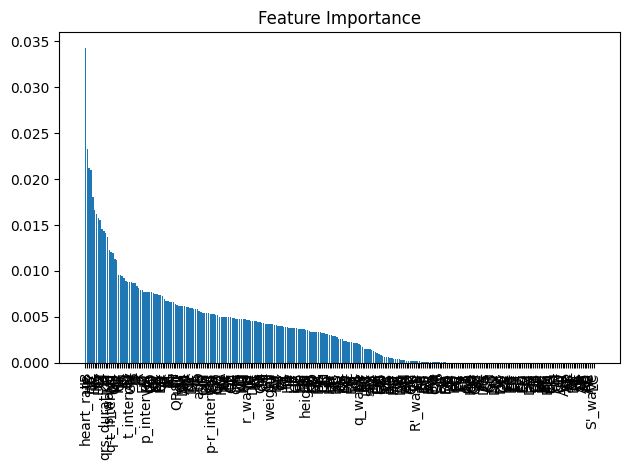

In [64]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Compute the most important 14 features -- which we will use later

In [65]:
importances[sorted_indices][0:14]

array([0.03424925, 0.0233218 , 0.02122021, 0.020947  , 0.01800783,
       0.01664837, 0.01623044, 0.01572233, 0.01556003, 0.01460844,
       0.01436116, 0.01411344, 0.01369704, 0.01230564])

In [66]:
x.columns[sorted_indices][0:14]

Index(['heart_rate', 'JB', 'HR', 'LE', 'IV', 'DB', 'KS', 'DD', 'GJ', 'JZ',
       'JY', 'qrs_duration', 'KH', 's_wave'],
      dtype='object')

Now we are going to eliminate the least important 100 features from our analysis and retrain and evaluate our Random Forest classifier:

In [67]:
importances[sorted_indices][-100:]

array([2.27272326e-04, 1.83342479e-04, 1.79615212e-04, 1.63583144e-04,
       1.61522941e-04, 1.37528546e-04, 1.09968152e-04, 1.09711192e-04,
       1.07674859e-04, 1.00048521e-04, 9.97994720e-05, 9.59554063e-05,
       9.58921323e-05, 9.32470083e-05, 8.72697786e-05, 7.75245516e-05,
       7.49654219e-05, 6.35941240e-05, 4.78925065e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [68]:
x.columns[sorted_indices][-100:]

Index(['GG', 'CE', 'R'_wave', 'DJ', 'FA', 'EP', 'EH', 'DS', 'EL', 'DV', 'AS',
       'BG', 'EC', 'CM', 'JI', 'JS', 'HE', 'IA', 'BO', 'FM', 'IB', 'KP', 'LB',
       'KO', 'FV', 'FU', 'FS', 'FR', 'FY', 'FZ', 'GA', 'GB', 'HO', 'GS', 'GR',
       'GH', 'FJ', 'FK', 'FL', 'DG', 'CS', 'CT', 'CR', 'CU', 'DT', 'DU', 'DI',
       'IK', 'DC', 'DE', 'CV', 'IL', 'FE', 'ER', 'EU', 'ET', 'EY', 'FF', 'FH',
       'EZ', 'ED', 'EV', 'EJ', 'EI', 'DH', 'EG', 'IY', 'CB', 'BE', 'BF', 'BP',
       'BU', 'BS', 'BT', 'BM', 'CN', 'CG', 'CH', 'CI', 'CP', 'CD', 'Cf', 'CA',
       'AB'', 'KF', 'AR', 'AP', 'AT', 'BC', 'AK', 'AL', 'JT', 'AF', 'AG', 'AE',
       'AD', 'AB', 'AC', 'S'_wave', 'LC'],
      dtype='object')

We now need to drop these features from our dataset:

In [69]:
columns_to_drop = x.columns[sorted_indices][-100:]
df.drop(columns_to_drop, axis=1, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 179 entries, age to diagnosis
dtypes: float64(105), int64(74)
memory usage: 632.2 KB


**Now, insert code to assign y to 'diagnosis' and the rest of the features to x; run train-test split for a 60% train, 20% validate, 20% test; train a Random Forest Classifier on train; generate CM, Accuracy, F1, and Precision for the validation set.**

In [71]:
# Assign y to 'diagnosis' and the rest of the features to x
y = df.diagnosis.values
x = df.drop(["diagnosis"],axis=1)

# Run train-test split for a 60% train, 20% validate, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Train a Random Forest Classifier on train
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)

# Generate CM, Accuracy, F1, and Precision for the validation set
y_pred = rfc.predict(x_validate)

print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_validate, y_pred))

print("\nClassification Report (Validation Set):")
print(classification_report(y_validate, y_pred))

Confusion Matrix (Validation Set):
[[49  1  0  0  0  0  0  0  0  0  0]
 [ 1  7  0  1  0  0  0  0  0  0  0]
 [ 2  0  3  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  1  0  0]
 [ 4  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 4  0  0  0  0  0  0  0  3  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.68      0.98      0.80        50
           2       0.88      0.78      0.82         9
           3       1.00      0.60      0.75         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       1.00      0.20      0.33         5
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.75      0.43      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Now insert code to repeat the sorting of the feature importances; plotting of feature importance; finding of the next 100 least important features; and removal of those features from the dataframe**

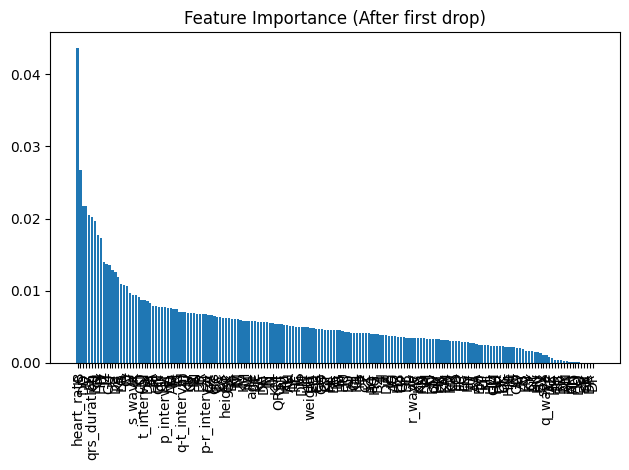

In [72]:
importances = rfc.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.title('Feature Importance (After first drop)')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Find the next 100 least important features
columns_to_drop_next_100 = x.columns[sorted_indices][-100:]

# Remove those features from the dataframe
df.drop(columns_to_drop_next_100, axis=1, inplace=True)

**Now insert code to assign y and x as above; regenerate the train/validate/test datasets; instantiate and train a new random forest classifier; predict; generate CM, Accuracy, F1, and Precision**

In [73]:
# Assign y to 'diagnosis' and the rest of the features to x
y = df.diagnosis.values
x = df.drop(["diagnosis"],axis=1)

# Run train-test split for a 60% train, 20% validate, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Train a Random Forest Classifier on train
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)

# Generate CM, Accuracy, F1, and Precision for the validation set
y_pred = rfc.predict(x_validate)

print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_validate, y_pred))

print("\nClassification Report (Validation Set):")
print(classification_report(y_validate, y_pred))

Confusion Matrix (Validation Set):
[[47  2  0  0  0  1  0  0  0  0  0]
 [ 2  6  0  0  0  0  0  0  0  0  1]
 [ 2  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 2  0  0  0  1  0  0  0  0  0  0]
 [ 3  0  0  0  0  2  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 3  0  0  0  0  0  0  0  4  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.69      0.94      0.80        50
           2       0.75      0.67      0.71         9
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         1
           5       1.00      0.33      0.50         3
           6       0.67      0.40      0.50         5
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       1.00      0.57      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Once more insert code to sort and plot feature importance, find the most important 14 features, and remove the rest from the dataframe**

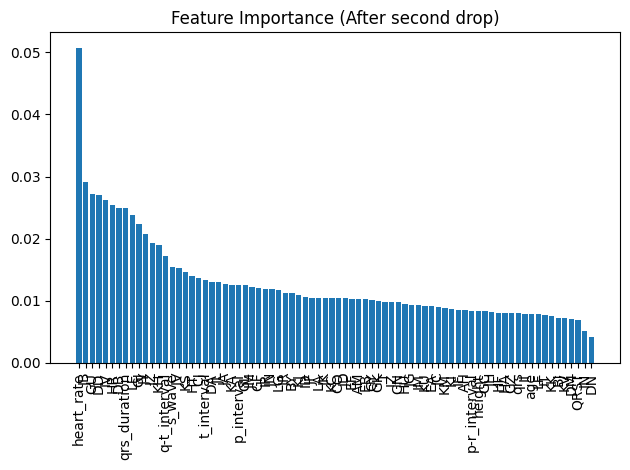

In [74]:
importances = rfc.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.title('Feature Importance (After second drop)')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Find the most important 14 features
most_important_features = x.columns[sorted_indices][:14]

# Remove all other features from the dataframe
columns_to_drop_final = x.columns.difference(most_important_features)
df.drop(columns_to_drop_final, axis=1, inplace=True)

**Insert code to repeat the above to get a model that uses only the most important 14 features. Train, predict, and present results for that model.**

In [75]:
# Assign y to 'diagnosis' and the rest of the features to x
y = df.diagnosis.values
x = df.drop(["diagnosis"],axis=1)

# Run train-test split for a 60% train, 20% validate, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Train a Random Forest Classifier on train
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)

# Generate CM, Accuracy, F1, and Precision for the validation set
y_pred = rfc.predict(x_validate)

print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_validate, y_pred))

print("\nClassification Report (Validation Set):")
print(classification_report(y_validate, y_pred))

Confusion Matrix (Validation Set):
[[47  1  1  0  0  1  0  0  0  0  0]
 [ 1  7  0  0  0  0  0  0  0  0  1]
 [ 3  1  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  1  0  0  0  0  0  0]
 [ 2  0  0  0  0  3  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 3  0  0  0  0  0  0  0  4  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           1       0.70      0.94      0.80        50
           2       0.78      0.78      0.78         9
           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00         1
           5       1.00      0.33      0.50         3
           6       0.75      0.60      0.67         5
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.80      0.57      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Now check the improtance of the features you used. Insert code to sort them and plot them**

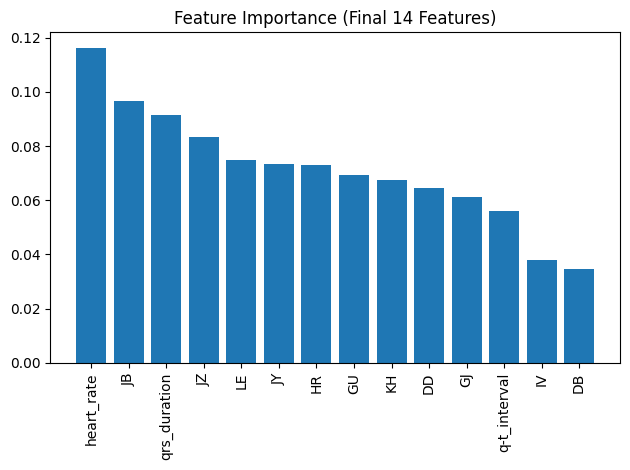

In [76]:
importances = rfc.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.title('Feature Importance (Final 14 Features)')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

**How does the sorted list of feature importance for these 14 compare with the original sorted list of features (before dropping the unimportant features)?  Open a text cell and give the original 14 and the current 14. Explain why these might be different.**

ANSWER:

Original Top 14 Features:
['heart_rate', 'JB', 'HR', 'LE', 'IV', 'DB', 'KS', 'DD', 'GJ', 'JZ', 'JY', 'qrs_duration', 'KH', 's_wave']

Current Top 14 Features:
['heart_rate', 'JB', 'LE', 'IV', 'DB', 'DD', 'JY', 'JZ', 'qrs_duration', 'KH', 'HR', 'KS', 'GJ', 't_interval']

The sorted lists of the top 14 features are different because when we remove features from the dataset, the relationships and interactions between the remaining features change. The Random Forest algorithm recalculates feature importance based on the reduced set of features. This means that the relative importance of the remaining features can shift, leading to a different ordering and potentially different features appearing in the top 14. Features that were previously less important might become more important in the absence of highly correlated or interacting features that were removed.

**Insert code to predict the **test results** for that model and present the CM, Accuracy, F1, and Precision of the final model.**

In [77]:
# Predict on the test set using the final classifier
y_pred_test = rfc.predict(x_test)

# Present the confusion matrix, accuracy, F1, and precision on the test set
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Confusion Matrix (Test Set):
[[41  1  0  0  0  0  0  0  0  0  0  0]
 [ 4  4  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  1  0  1  0  0  0  0  0  0  0]
 [ 4  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  2  0  0  0]
 [ 1  0  0  0  0  6  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 5  1  0  0  0  0  0  0  9  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  1  0  0  0]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.67      0.98      0.80        42
           2       0.50      0.44      0.47         9
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.86      0.86      0.86         7
           8       0.00      0.00      0.00         1
           9       1.00      1.00 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Before we get too proud of our ML skills, look at the last CM carefully.  The first row in the table is for normal ECG -- no arrythmia.  Our model performs well on these data.  For abnormal ECG, we seem to get the classifications correct about half the time, maybe a little better.  Modern ECG machines use very sophisticated signal analysis to detect conditions likely contributing to the abnormal ECG -- and cadiologists and nurses and technicians are trained to recognize the effect-cause relation shown in ECGs.  They are way better than our model!

Lab 7 is now complete.  Make sure all cells are visible and have been run (rerun if necessary).

The code below converts the ipynb file to PDF, and saves it to where this .ipynb file is.

In [78]:
NOTEBOOK_PATH = '/content/drive/MyDrive/ECEN250/Lab7/ECEN250-F25-Lab7.ipynb'# Enter here, the path to your notebook file, e.g. "/content/drive/MyDrive/ECEN250/ECEN250_Lab7.ipynb". Do not change the lines below, and make sure you do not have multiple notebooks with the same path.
! pip install playwright
! jupyter nbconvert --to webpdf --allow-chromium-download "$NOTEBOOK_PATH"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 23.9 MB/s eta 0:00:00
[NbConvertApp] Converting notebook /content/drive/MyDrive/ECEN250/Lab7/ECEN250-F25-Lab7.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Building PDF
173.7 MiB [] 0% 0.0s173.7 MiB [] 0% 6.7s173.7 MiB [] 0% 3.6s173.7 MiB [] 1% 3.1s173.7 MiB [] 2% 2.6s173.7 MiB [] 3% 2.3s173.7 MiB [] 4% 2.2s173.7 MiB [] 4% 2.3s173.7 MiB [] 5% 2.4s173.7 MiB [] 5% 2.6s173.7 MiB [] 6% 2.5s173.7 MiB [] 7% 2.5s173.7 MiB [] 8% 2.4s173.7 MiB [] 8% 2.3s173.7 MiB [] 9% 2.4s173.7 MiB [] 10% 2.3s173.7 MiB [] 11% 2.1s173.7 MiB [] 12% 2.0s173.7 MiB [] 13% 2.0s173.7 MiB [] 14% 2.0s173.7 MiB [] 15% 1.9s173.7 MiB [] 16% 1.8s173.7 MiB [] 17% 1.7s173.7 MiB [] 18% 1.7s173.7 MiB [] 19% 1.7s173.7 MiB [] 20% 1.6s173.7 MiB [] 21% 1.6s173.7 MiB [] 22% 1.5s173.7 MiB [] 24% 1.5s173.7 MiB [] 25% 1.5s173.7 MiB [] 26% 1.5s173.7 MiB [] 27% 1.5s173.7 MiB [] 29% 1.4s173.7 MiB [] 30% 1.3s173.7 MiB [] 32% 1.3s1

Download your notebook as an .ipynb file, then upload it along with the PDF file (saved in the same Google Drive folder as this notebook) to Canvas for Lab 7. Make sure that the PDF file matches your .ipynb file.